# EU Wind Power Dataset

The dataset contains data from different EU countries, from 1986 to 2015, on Wind Energy Potential per Hour.
The second dataset contains information on the wind power stations themselves, along the same time period.

This analysis will focus namely on predicting Wind Energy Potential for the next hour, in Portugal.

There is still a lot to improve, namely in the plotting domain. Any constructive feedback is very welcome :)

In [96]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as pltdt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

##  Starting with Dataframe HOUR vs COUNTRY

In [73]:
coun = pd.read_csv("EMHIRESPV_TSh_CF_Country_19862015.csv")
coun.head(3)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
coun.shape

(262968, 29)

In [75]:
t = pd.date_range('1/1/1986', periods = 262968, freq = 'H')

In [76]:
coun["Hour"] = t
coun.set_index("Hour", inplace = True, )
coun.head(3)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
Hour,,,,,,,,,,,,,,,,,,,,,
1986-01-01 00:00:00,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-01-01 01:00:00,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-01-01 02:00:00,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


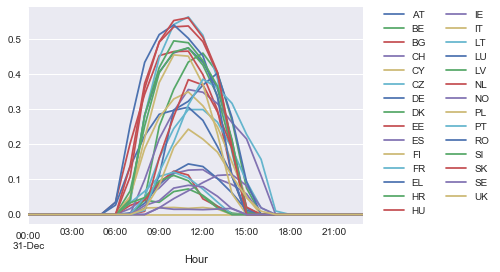

In [82]:
coun['2015-12-31'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol = 2,  borderaxespad=0.)

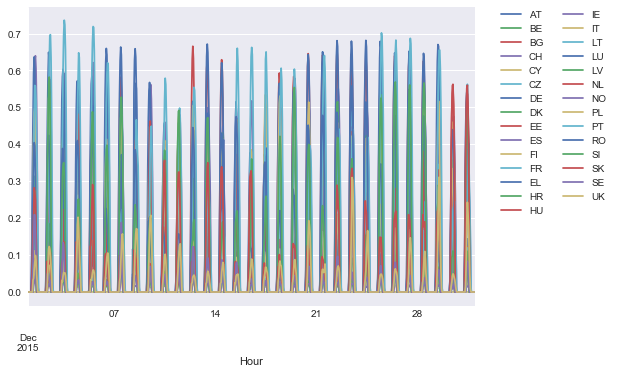

In [50]:
coun['2015-12'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol = 2,  borderaxespad=0.)

## per Day

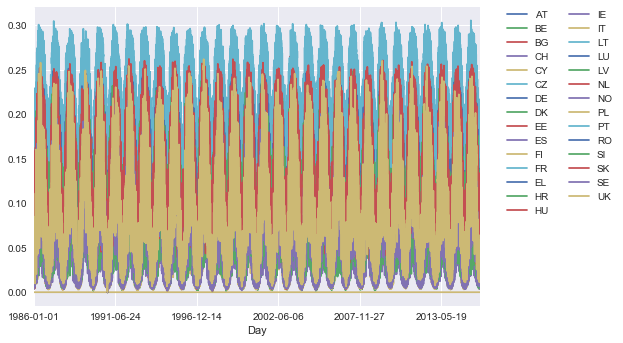

In [51]:
coun['Day']=coun.index.map(lambda x: x.strftime('%Y-%m-%d'))
c_group_day = coun.groupby('Day').mean()
c_group_day.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol = 2,  borderaxespad=0.)

Cyprus has always null values for Wind Power production and it becomes very evident in this picture

## per Month

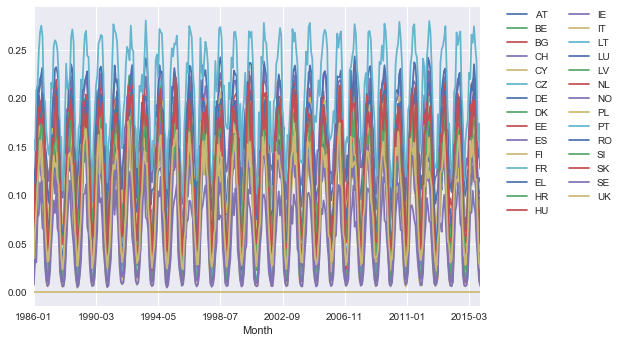

In [52]:
coun['Month']=coun.index.map(lambda x: x.strftime('%Y-%m'))
coun['Month_only']=coun.index.map(lambda x: x.strftime('%m'))
c_group_month = coun.groupby('Month').mean()
c_group_month.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol = 2,  borderaxespad=0.)

## per Year

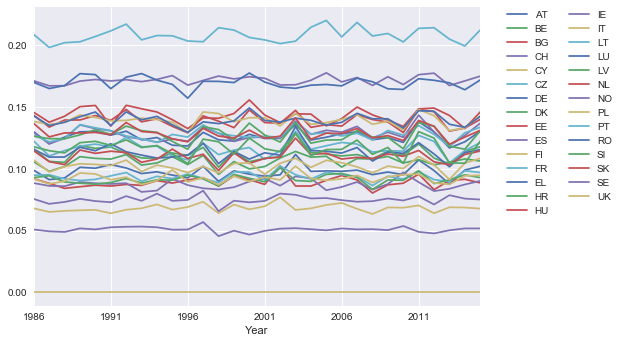

In [53]:
coun['Year']=coun.index.map(lambda x: x.strftime('%Y'))
c_group_year = coun.groupby('Year').mean()
c_group_year.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol = 2,  borderaxespad=0.)

# Zooming in on Portugal

Let's start by seeing how Portugal has been doing in the wind energy sector in this 30 year time period.

In [13]:
pt_heatmap = coun.pivot_table(index = 'Month_only', columns = 'Year', values = 'PT')
pt_heatmap.sortlevel(level = 0, ascending = True, inplace = True)
pt_heatmap.head(3)

Year,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Month_only,,,,,,,,,,,,,,,,,,,,,
01,0.157347,0.141942,0.118634,0.169109,0.157210,0.153578,0.186282,0.174522,0.156587,0.157785,...,0.167230,0.160477,0.143833,0.120180,0.122236,0.137270,0.189102,0.128186,0.117079,0.168732
02,0.146559,0.155250,0.175961,0.175148,0.181153,0.163107,0.199251,0.213200,0.153866,0.169774,...,0.187132,0.154343,0.169881,0.197561,0.138344,0.187845,0.241252,0.183798,0.136729,0.178020
03,0.208178,0.216245,0.236040,0.219724,0.213389,0.185804,0.234350,0.207144,0.239965,0.229146,...,0.174762,0.229745,0.215502,0.237952,0.184702,0.194548,0.232963,0.151709,0.206261,0.226679


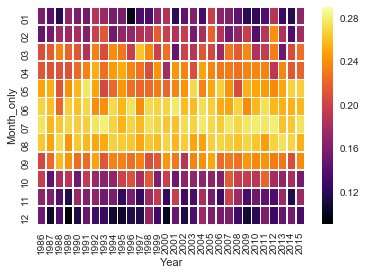

In [91]:
sns.heatmap(pt_heatmap, vmin = 0.09, vmax = 0.29, cmap = 'inferno', linewidth = 0.5)

C:\Program Files\Anaconda3\envs\ztdl\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


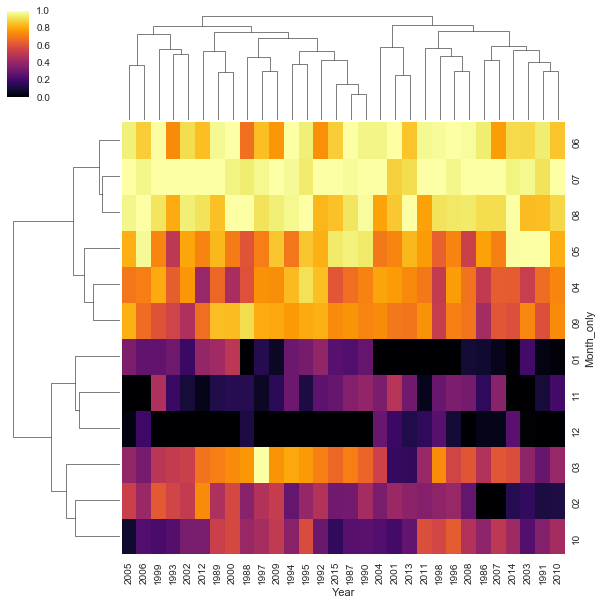

In [15]:
sns.clustermap(pt_heatmap, cmap = 'inferno', standard_scale = 1)

It's very curious to observe that the best wind energy potential values also coincide with the months deemed more lucrative for solar energy production, that is, the best values range from April to September (~ Spring ~ Summer) and lower values from October to February (~ Autumn ~ Winter). There was a significant sequence of years where March was also very productive for the wind-powered energy sector.

## Let's look at it from a time-series perspective

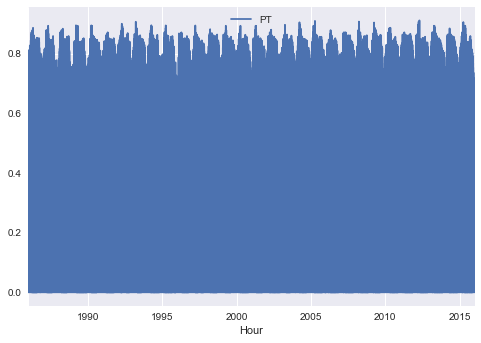

In [16]:
pt_ts = coun.filter(['Month','Year','PT'], axis = 1)
pt_ts.plot()

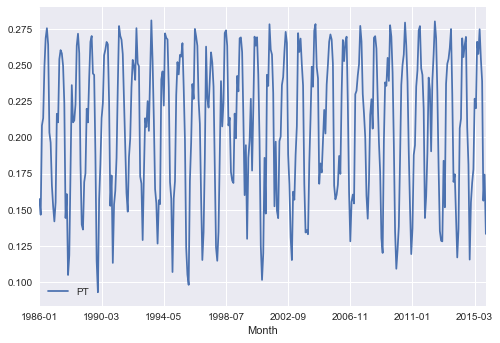

In [17]:
pt_ts_m = pt_ts.groupby('Month').mean()
pt_ts_m.plot()

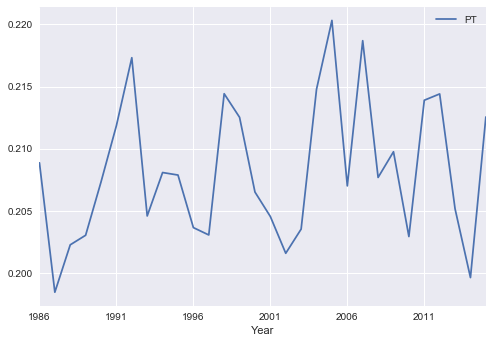

In [18]:
pt_ts_y = pt_ts.groupby('Year').mean()
pt_ts_y.plot()

## Testing some predictions 

Let's see if we can develop a RNN model to predict the next hour's wind energy potential value, considering a rolling window of 24h.

It will be only considered the last month of the last year for better visualization (country - PT).

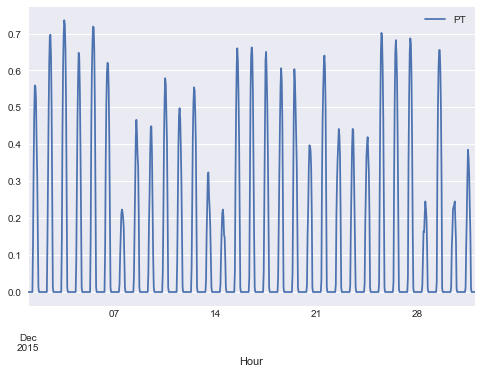

In [19]:
pt_nn = coun.filter(['Hour', 'PT'], axis = 1)

pt_nn = pt_nn.reset_index()
pt_nn['Hour'] = pd.to_datetime(pt_nn['Hour'])

start = pd.Timestamp('2015-12-01')
split = pd.Timestamp('2015-12-22')
pt_nn = pt_nn[pt_nn['Hour']>=start]

pt_nn = pt_nn.set_index('Hour')

pt_nn.plot()

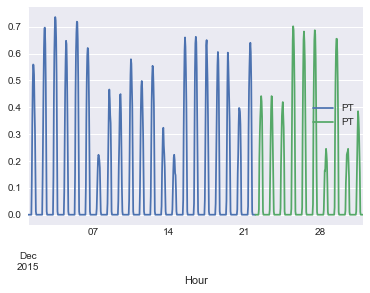

In [93]:
train = pt_nn.loc[:split, ['PT']]
test = pt_nn.loc[split:, ['PT']]
tr_pl = train
te_pl = test
ax = tr_pl.plot()
te_pl.plot(ax=ax)

So our train set is in blue, up to the 22nd December, and our test set is from then onwards (green).

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = X_train[1:]
X_train = X_train[:-1]            # in order for arrays to have same length

X_test = test_sc[:-1]
y_test = X_test[1:]
X_test = X_test[:-1]

### Rolling Windows

In [22]:
train_df = pd.DataFrame(train_sc, columns = ['PT'], index = train.index )
test_df = pd.DataFrame(test_sc, columns = ['PT'], index = test.index )

In [24]:
for s in range(1, 25):
    train_df['shift {}'.format(s)] = train_df['PT'].shift(s, freq = 'H')
    test_df['shift {}'.format(s)] = test_df['PT'].shift(s, freq = 'H')

train_df.head(3)

,PT,shift 1,shift 2,shift 3,shift 4,shift 5,shift 6,shift 7,shift 8,shift 9,...,shift 15,shift 16,shift 17,shift 18,shift 19,shift 20,shift 21,shift 22,shift 23,shift 24
Hour,,,,,,,,,,,,,,,,,,,,,
2015-12-01 00:00:00,-0.645215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-01 01:00:00,-0.645215,-0.645215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-01 02:00:00,-0.645215,-0.645215,-0.645215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
X_train = train_df.dropna().drop('PT', axis = 1)
y_train = train_df.dropna()[['PT']]

X_test = test_df.dropna().drop('PT', axis = 1)
y_test = test_df.dropna()[['PT']]
X_train.head(3)

,shift 1,shift 2,shift 3,shift 4,shift 5,shift 6,shift 7,shift 8,shift 9,shift 10,...,shift 15,shift 16,shift 17,shift 18,shift 19,shift 20,shift 21,shift 22,shift 23,shift 24
Hour,,,,,,,,,,,,,,,,,,,,,
2015-12-02 00:00:00,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.588012,0.121304,0.842061,1.242481,...,0.899263,-0.038864,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215
2015-12-02 01:00:00,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.588012,0.121304,0.842061,...,1.585698,0.899263,-0.038864,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215
2015-12-02 02:00:00,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.588012,0.121304,...,1.963237,1.585698,0.899263,-0.038864,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215,-0.645215


In [26]:
X_train.shape

(481, 24)

In [27]:
# to np.array
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

### The Predictive Model

In [28]:
# Needs to be re-dimensioned for LSTM layer
X_train_w = X_train.reshape(X_train.shape[0], 1, 24)
X_test_w = X_test.reshape(X_test.shape[0], 1, 24)
X_train_w.shape

(481, 1, 24)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import keras.backend as K

Using TensorFlow backend.


In [30]:
K.clear_session()

eps = 100
bs = 1

in_sh = (1, 24) 
hidden_1= 12
hidden_2= 12
outputs = 1

model = Sequential()
model.add(LSTM(hidden_1, input_shape = in_sh,))
model.add(Dense(hidden_2, activation ='relu'))
model.add(Dense(outputs))
model.compile(optimizer='adam', loss='mean_squared_error',)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 1,945
Trainable params: 1,945
Non-trainable params: 0
_________________________________________________________________


In [31]:
early_stop = EarlyStopping(monitor = 'loss', patience = 1, verbose = 1)

In [32]:
model.fit(X_train_w, y_train, epochs = eps, batch_size = bs, verbose = 1 , callbacks = [early_stop])

Epoch 1/100
481/481 [==============================] - 3s - loss: 0.3313     
Epoch 2/100
481/481 [==============================] - 1s - loss: 0.0562     
Epoch 3/100
481/481 [==============================] - 1s - loss: 0.0382     
Epoch 4/100
481/481 [==============================] - 1s - loss: 0.0305     
Epoch 5/100
481/481 [==============================] - 1s - loss: 0.0278     
Epoch 6/100
481/481 [==============================] - 1s - loss: 0.0228     
Epoch 7/100
481/481 [==============================] - 1s - loss: 0.0214     
Epoch 8/100
481/481 [==============================] - 1s - loss: 0.0207     
Epoch 9/100
481/481 [==============================] - 1s - loss: 0.0186     
Epoch 10/100
481/481 [==============================] - 1s - loss: 0.0184     
Epoch 11/100
481/481 [==============================] - 1s - loss: 0.0174     
Epoch 12/100
481/481 [==============================] - 1s - loss: 0.0168     
Epoch 13/100
481/481 [==============================] - 1s - 

In [33]:
y_pred = model.predict(X_test_w)

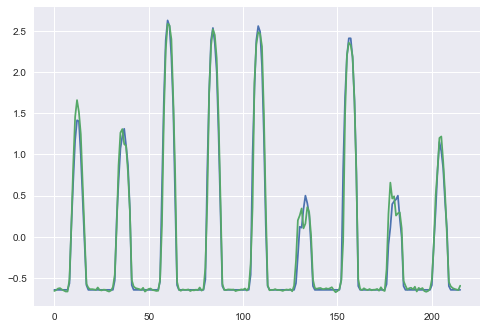

In [34]:
plt.plot(y_test)
plt.plot(y_pred)

Our Recurrent Neural Network seems to be predicting the future values quite well.

# Now onto the various wind energy potential facilities

In [97]:
nuts = pd.read_csv("TS.CF.N2.30yr.csv")
nuts.head(3)

,PL41,ES21,PL32,UKK1,PL34,ES24,CZ06,UKM6,CZ03,ES41,...,DEC0,ITF1,DE72,FR43,ITI4,NL13,DE26,FR26,DEB1,FR51
0,0.02459,0.21347,0.07598,0.54705,0.16948,0.74278,0.19489,0.25882,0.39191,0.39901,...,0.00789,0.12955,0.01418,0.02576,0.00837,0.22188,0.10633,0.00694,0.01503,0.23464
1,0.01484,0.20183,0.08367,0.44395,0.16234,0.67600,0.20313,0.26939,0.49726,0.40523,...,0.00489,0.06775,0.01930,0.09015,0.00382,0.22000,0.08869,0.01537,0.01837,0.16941
2,0.00972,0.19800,0.09651,0.29984,0.15206,0.56476,0.18398,0.28269,0.51833,0.41098,...,0.00152,0.02894,0.02965,0.13212,0.00109,0.21906,0.06603,0.02435,0.01747,0.11864


In [98]:
nuts.shape

(262968, 255)

In [99]:
nuts["Hour"] = t
nuts.set_index("Hour", inplace = True)
nuts.head(3)

,PL41,ES21,PL32,UKK1,PL34,ES24,CZ06,UKM6,CZ03,ES41,...,DEC0,ITF1,DE72,FR43,ITI4,NL13,DE26,FR26,DEB1,FR51
Hour,,,,,,,,,,,,,,,,,,,,,
1986-01-01 00:00:00,0.02459,0.21347,0.07598,0.54705,0.16948,0.74278,0.19489,0.25882,0.39191,0.39901,...,0.00789,0.12955,0.01418,0.02576,0.00837,0.22188,0.10633,0.00694,0.01503,0.23464
1986-01-01 01:00:00,0.01484,0.20183,0.08367,0.44395,0.16234,0.67600,0.20313,0.26939,0.49726,0.40523,...,0.00489,0.06775,0.01930,0.09015,0.00382,0.22000,0.08869,0.01537,0.01837,0.16941
1986-01-01 02:00:00,0.00972,0.19800,0.09651,0.29984,0.15206,0.56476,0.18398,0.28269,0.51833,0.41098,...,0.00152,0.02894,0.02965,0.13212,0.00109,0.21906,0.06603,0.02435,0.01747,0.11864
